In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [6]:
data = pd.read_csv('Market_Segemntaion.csv')
data.describe()

,Satisfaction,Loyalty
count,30.000000,30.000000
mean,6.400000,0.001000
std,2.620871,1.016476
min,1.000000,-1.690000
25%,4.250000,-0.967500
50%,7.000000,0.150000
75%,8.750000,0.947500
max,10.000000,1.380000


## Plot the data

Text(0, 0.5, 'Loyalty')

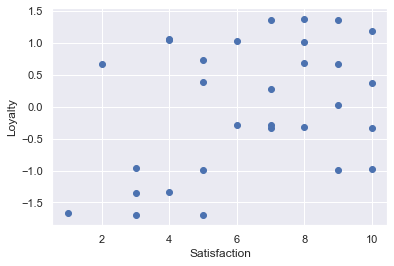

In [8]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

### Select The features

In [9]:
x = data.copy()

Clustering

In [14]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering Results

In [16]:
clusters = x.copy()
clusters['Cluster_pred'] = kmeans.fit_predict(x)

Text(0, 0.5, 'Loyalty')

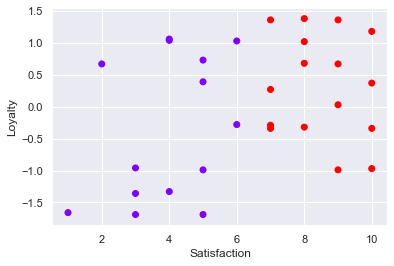

In [17]:
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'], c = clusters['Cluster_pred'], cmap ='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## The porblem here the clusters measured by satis only, because the value of it is bigger, so standardization is the solution, which makes the values kinda equal so the kmeans will cluster equally

### Standardize the variables to make it equal but different values

In [19]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

As we see the value of loyalty remained the same, but the value of satsi changed to be kinda the same as the loaylty, this help so much when clustering differen't data scales

### Take advantage of the Elbow method ### it helps to declare the number of clusters

In [21]:
wcss =[]

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(kmeans.inertia_)# append is a method to add wcss_iter to wcss list
wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.634898754940157,
 5.363006425346784,
 4.352037765292862,
 3.7799886162052663]

Text(0, 0.5, 'Within-cluster Sum of Squares')

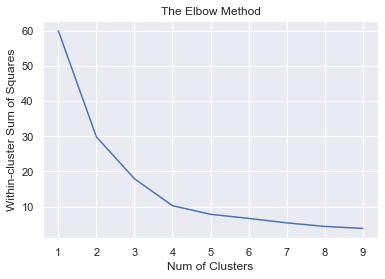

In [22]:
number_clusters = range(1,10)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Num of Clusters')
plt.ylabel('Within-cluster Sum of Squares')

### Explore clustering solutions and selecting the number of clusters

In [37]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['Cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [38]:
clusters_new

,Satisfaction,Loyalty,Cluster_pred
0,4,-1.33,1
1,6,-0.28,2
2,5,-0.99,1
3,7,-0.29,2
4,4,1.06,3
5,1,-1.66,1
6,10,-0.97,2
7,8,-0.32,2
8,8,1.02,0
9,8,0.68,0


the data above are the orginial but prediction based on standardized data

Text(0, 0.5, 'Loyalty')

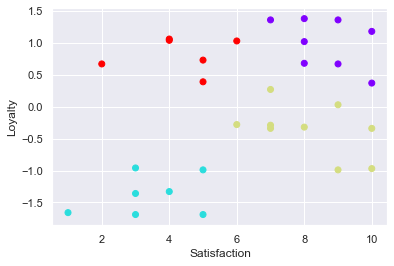

In [39]:
plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'], c = clusters_new['Cluster_pred'], cmap ='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')